In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

### Method-1

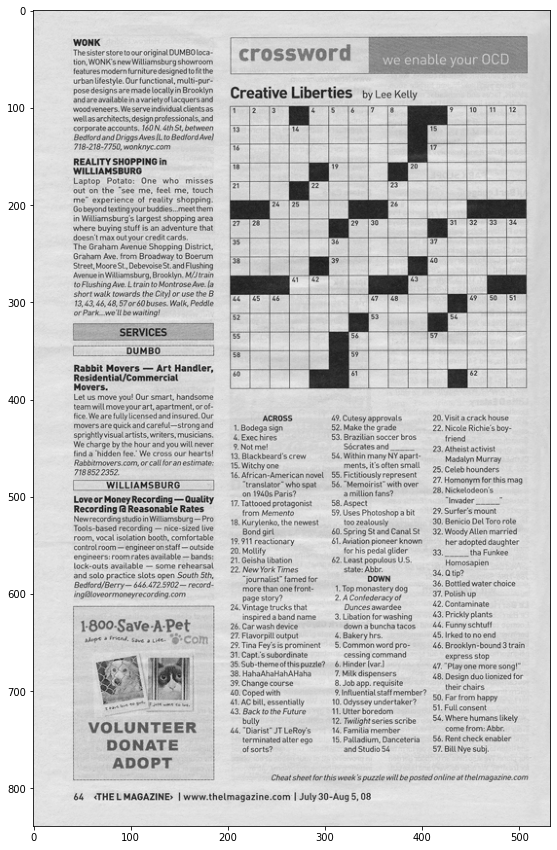

In [3]:
# reading image as gray-scale
img = cv2.imread('crossword.jpg', 0)
plt.figure(figsize=(15,15))
plt.imshow(img, cmap='gray');

In [4]:
print('\nGray scale image shape = ', img.shape)


Gray scale image shape =  (839, 532)


In [5]:
# any value below 127 will be shifted down to zero and any value above 127 will shifted to max value
value, th_image = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)

In [6]:
# to inverse
value, th_image_inv = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)

In [7]:
hist_gray = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_th = cv2.calcHist([th_image],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_th_inv = cv2.calcHist([th_image_inv],channels=[0],mask=None,histSize=[256],ranges=[0,256])

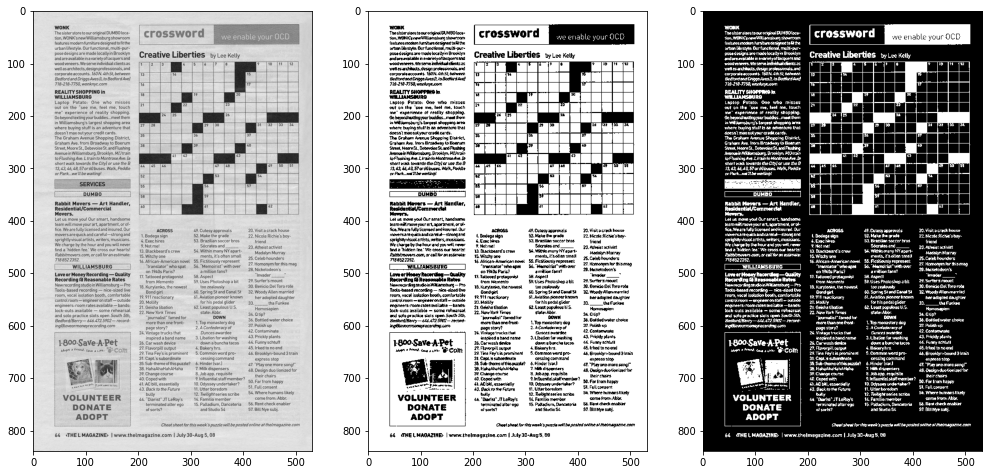

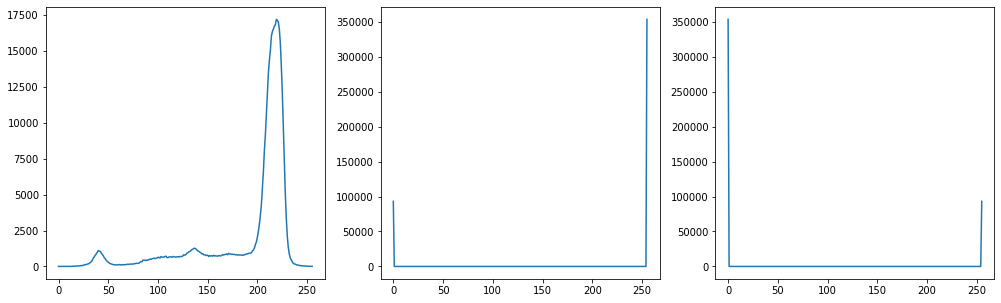

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 1, ncols = 3, figsize= (17,10))
ax1.imshow(img, cmap='gray')
ax2.imshow(th_image, cmap='gray')
ax3.imshow(th_image_inv, cmap='gray')

fig, (ax4, ax5, ax6) = plt.subplots(nrows= 1, ncols = 3, figsize= (17,5))
ax4.plot(hist_gray)
ax5.plot(hist_th)
ax6.plot(hist_th_inv);

### Method-2

In [9]:
# reading image as gray-scale
img = cv2.imread('crossword.jpg', 0)

In [10]:
# adaptive threshold
th2_image = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)

In [11]:
# inverse of above
th2_image_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 8)

In [12]:
hist_gray_2 = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_th2 = cv2.calcHist([th2_image],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_th2_inv = cv2.calcHist([th2_image_inv],channels=[0],mask=None,histSize=[256],ranges=[0,256])

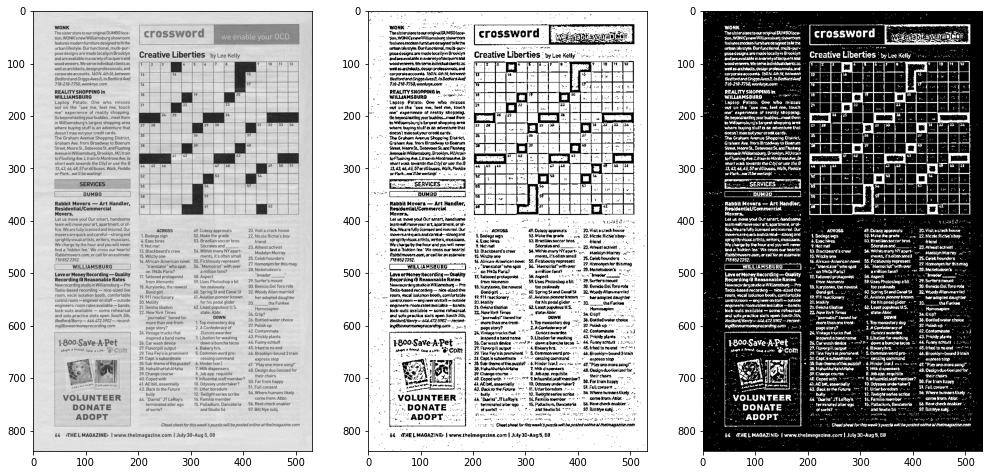

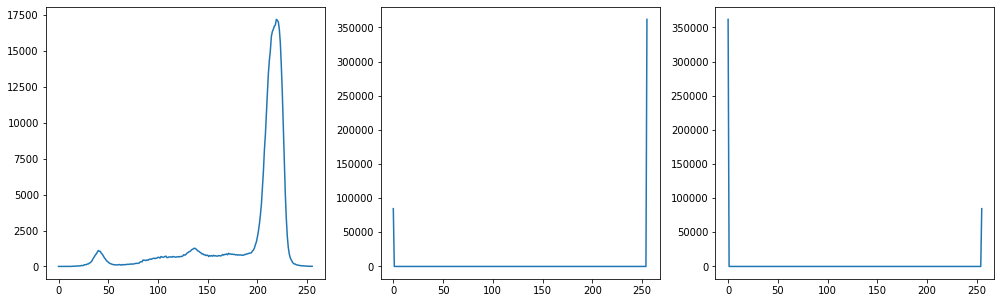

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 1, ncols = 3, figsize= (17,10))
ax1.imshow(img, cmap='gray')
ax2.imshow(th2_image, cmap='gray')
ax3.imshow(th2_image_inv, cmap='gray')

fig, (ax4, ax5, ax6) = plt.subplots(nrows= 1, ncols = 3, figsize= (17,5))
ax4.plot(hist_gray_2)
ax5.plot(hist_th2)
ax6.plot(hist_th2_inv);

### Method-1 & Method-2

		 Binary Threshold Inverse 				 Adaptive Binary Threshold inverse


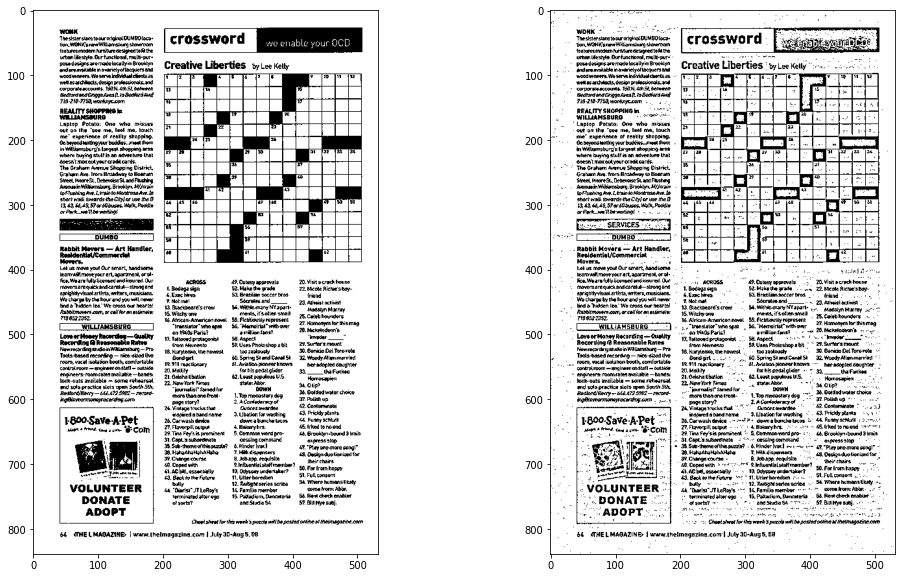

In [14]:
print('\t\t Binary Threshold Inverse \t\t\t\t Adaptive Binary Threshold inverse')
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols = 2, figsize= (17,10))
ax1.imshow(th_image, cmap='gray')
ax2.imshow(th2_image, cmap='gray');

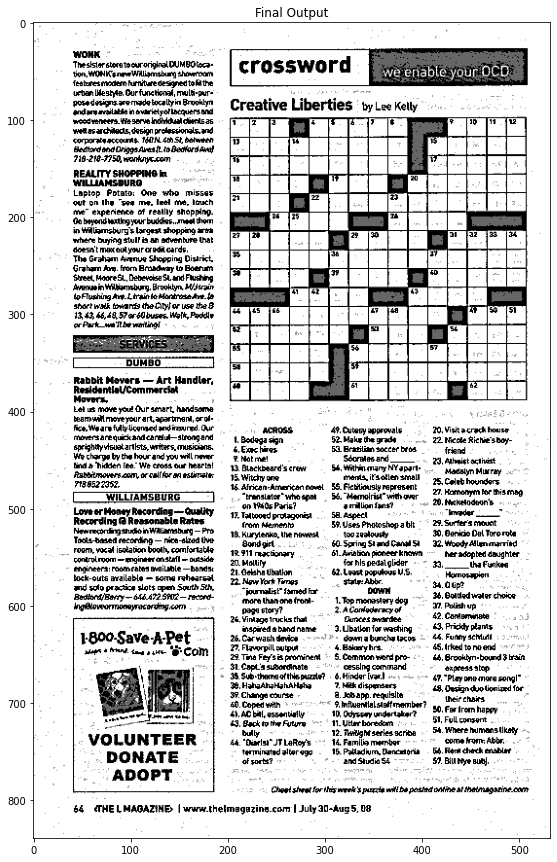

In [15]:
# blend th_image & th2_image to get better results
blended = cv2.addWeighted(src1=th_image, alpha=0.6, src2=th2_image, beta=0.4, gamma=0)

plt.figure(figsize=(15,15))
plt.title('Final Output')
plt.imshow(blended, cmap='gray');